## Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.
Dataset
Population of U.S. Cities
## Description
The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.
## Format
This data frame contains the following columns:
u The 1920 population.
x The 1930 population.
There is one unnamed column also in this dataset. Please remove and ignore that coloumn.
Source
The data were obtained from
Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley
References
Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.


## Question 1 Read the dataset given in file named 'bigcity.csv'.
## And check the dataset for any missing values and also print out the correlation matrix

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [222]:
# Numerical libraries
import numpy as np 
from numpy.polynomial.polynomial import polyfit
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# to handle data in form of rows and columns 
import pandas as pd   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [223]:
# reading the CSV file
bigCity_df = pd.read_csv("bigcity.csv")  
bigCity_df.drop(bigCity_df.columns[0],axis=1,inplace=True)
#missing value in U
missingValueInU = pd.DataFrame(bigCity_df.u.isna())
print("Missing value in u",missingValueInU[missingValueInU['u'] == True])
#missing value in x
missingValueInX = pd.DataFrame(bigCity_df.x.isna())
print("Missing value in X",missingValueInX[missingValueInX['x'] == True])  

#Correlation of dataframe
bigCity_df.corr()

Missing value in u Empty DataFrame
Columns: [u]
Index: []
Missing value in X Empty DataFrame
Columns: [x]
Index: []


,u,x
u,1.000000,0.981742
x,0.981742,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

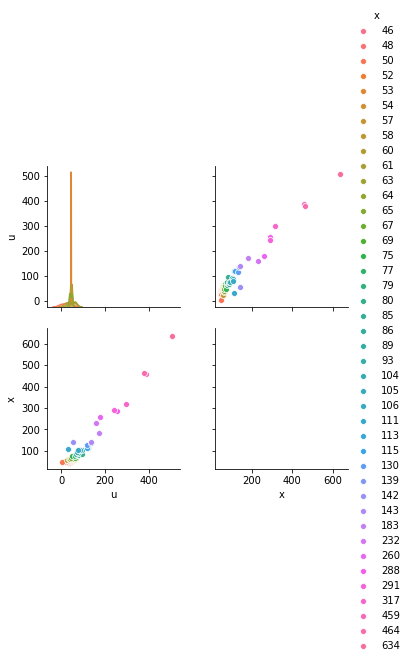

In [224]:
sns.pairplot(bigCity_df, diag_kind='kde', hue = 'x')   # to plot density curve instead of histogram

## The high correlation betwwen u and x indicates that the variable u can be a good predictor of variable x

## Question 2 - Transform the dataset and Split data into train, test sets.
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe.
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [225]:
bigCity_df_scaled = bigCity_df.apply(zscore)
bigCity_df_scaled = pd.DataFrame(bigCity_df_scaled, columns=bigCity_df.columns)
U = bigCity_df_scaled[['u']]
X = bigCity_df_scaled[['x']]
X_train, X_test, y_train, y_test = train_test_split(U, X, test_size=0.20, random_state=1)#80-20 split
print("X_train Records:",X_train.count())
print("y_train Records:",y_train.count())
print("X_test Records:",X_test.count())
print("y_test Records:",y_test.count())
type(X_train)

X_train Records: u    39
dtype: int64
y_train Records: x    39
dtype: int64
X_test Records: u    10
dtype: int64
y_test Records: x    10
dtype: int64


pandas.core.frame.DataFrame

## Question 3 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [226]:
# invoke the LinearRegression function
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))    

intercept = regression_model.intercept_[0]
print("The intercept is {}".format(intercept))

The coefficient for u is 0.9831983927040457
The intercept is 0.01240497188752547


## Question 4 - Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.
Hint - y = mx + c, plot y

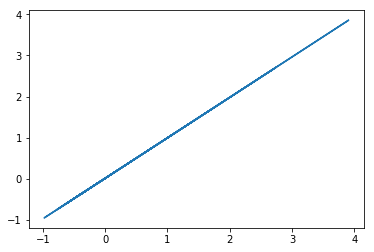

In [227]:
y = regression_model.coef_[0][0] * X_train + regression_model.intercept_[0]
plt.plot(X_train,y)

## Question 5 - Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. 
Performing root operation over mean square error over mean square error gives you root mean square error

In [228]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Validate the model with Root Mean Squares error
y_Predict = regression_model.predict(X_test)

print("mean_squared_error:",mean_squared_error(y_test,y_Predict))
# Validate the model with R2

print("r2_score:",r2_score(y_test,y_Predict))

mean_squared_error: 0.03682752839849216
r2_score: 0.918192256039698


## Question 6 - Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [229]:
print("Training Score:",regression_model.score(X_train,y_train))
print("Testing Score:",regression_model.score(X_test, y_test))

Training Score: 0.9682175540860047
Testing Score: 0.9181922560396981


# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [230]:
#Import all the necessary modules


## Q7. Load the PIMA Indian Diabetes file into Python DataFrame. And print 10 samples from the dataset


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [231]:
pima_df = pd.read_csv("pima-indians-diabetes.csv")  
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

In [232]:

pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Q8 Print the datatypes of each column and the shape of the dataset. And replace all the 0s in the column with the median of the same column value accordingly.

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [233]:
print("shape:",pima_df.shape)
pima_df.dtypes

shape: (768, 9)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [234]:
# replace all the 0s in the column with the median
pima_df_Corrected = pima_df.iloc[:,:-1].apply(lambda x:x.replace(0,x.median()),axis=0)
pima_df_Corrected["Class"] = pima_df["Class"]

## Q9 See the distribution of 'Class' variable and plot it using appropriate graph.

## Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Using the plot - infer the relationship between different variables

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


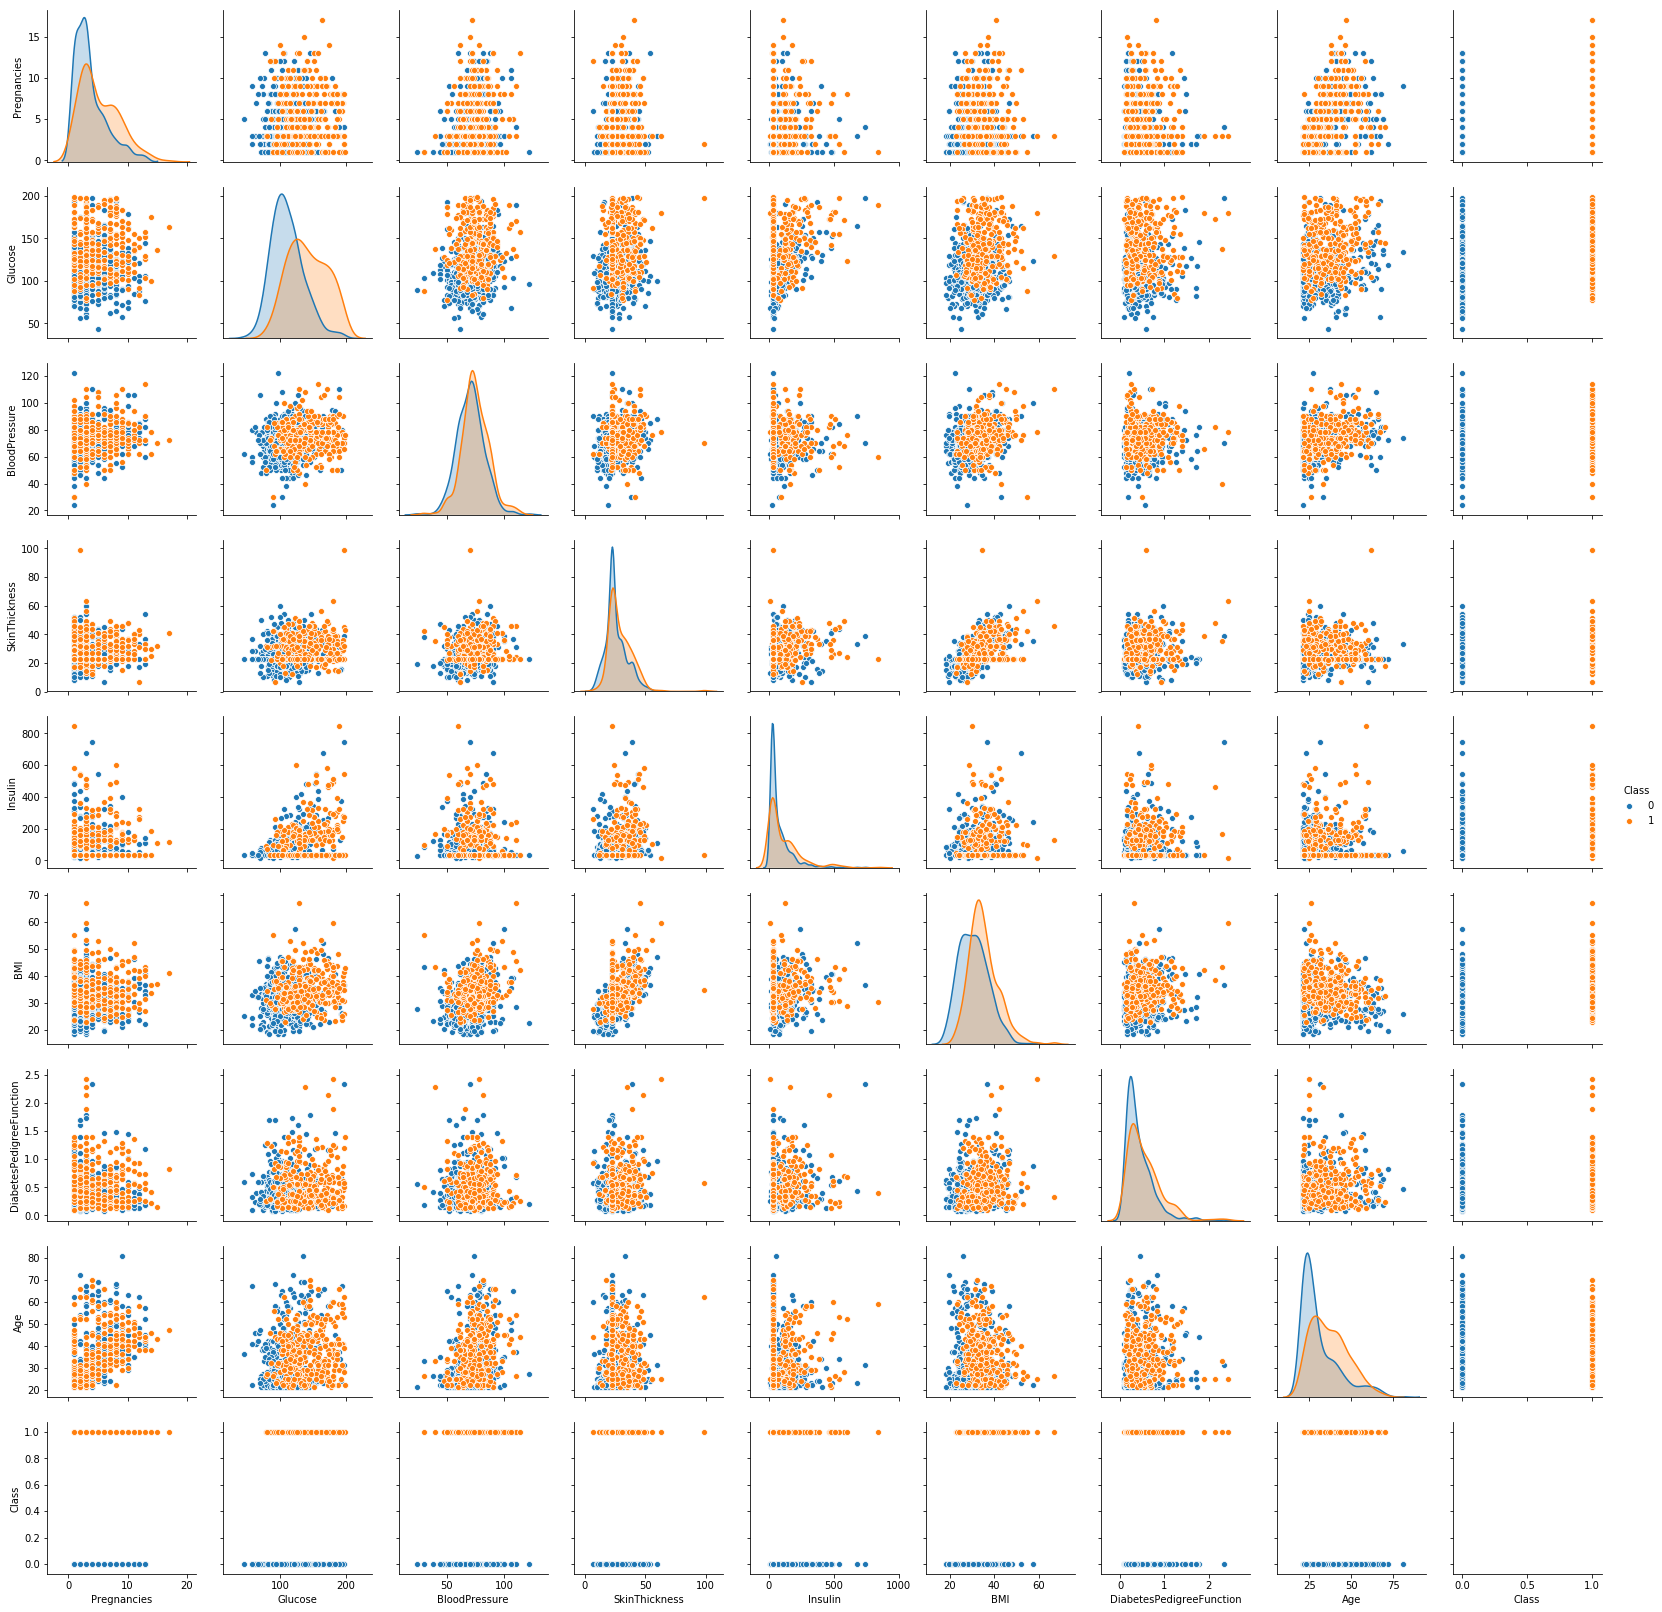

In [235]:
sns.pairplot(pima_df_Corrected, diag_kind='kde',  hue = 'Class')

## Q10 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test). And create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.


In [236]:
X = pima_df.iloc[:,:-1]
Y = pima_df.iloc[:,-1]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)#split in 70:30 format
#Create decision tree
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Q11 Print the accuracyof the model and print the confusion matrix.

In [237]:
#accuracy of model
ypred=model.predict(xtest)
acc=metrics.accuracy_score(ytest,ypred)
print(acc)

0.7186147186147186


In [238]:
#confusion matrix
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

[[124  33]
 [ 32  42]]


Print the feature importance of the decision model - Optional

In [239]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = xtrain.columns))

                               Imp
Pregnancies               0.096686
Glucose                   0.258432
BloodPressure             0.072037
SkinThickness             0.077448
Insulin                   0.028179
BMI                       0.209993
DiabetesPedigreeFunction  0.154372
Age                       0.102853


## Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [240]:
rfModel = RandomForestClassifier()
rfModel.fit(xtrain,ytrain)
yRFpred=model.predict(xtest)
acc=metrics.accuracy_score(ytest,yRFpred)
print(acc)

0.7186147186147186


## Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [241]:
abcl = AdaBoostClassifier(base_estimator=rfModel,n_estimators= 51)
abcl.fit(xtrain,ytrain)
adBoostPredict = abcl.predict(xtest)
acc=metrics.accuracy_score(ytest,adBoostPredict)
print(acc)

0.7835497835497836


## Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [242]:
baggModel = BaggingClassifier(base_estimator=rfModel,n_estimators= 51)
baggModel.fit(xtrain,ytrain)
baggingPredict = baggModel.predict(xtest)
acc=metrics.accuracy_score(ytest,baggingPredict)
print(acc)

0.7792207792207793


## Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [243]:
gbcl = GradientBoostingClassifier(n_estimators= 51)
gbcl.fit(xtrain,ytrain)
gbclPredict = gbcl.predict(xtest)
acc=metrics.accuracy_score(ytest,gbclPredict)
print(acc)

0.7878787878787878


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.